In [2]:
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos.
import pandas as pd
import os
from pathlib import Path

# **Anime recommendation**

## **Carga de datos**

In [24]:
#Anime.csv
path = Path(os.getcwd())
path = str(path.parent.absolute())
path = path+"/datos/anime.csv"
dfAnime = pd.read_csv(path,na_values='?')    
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [25]:
#rating.csv
path2 = Path(os.getcwd())
path2 = str(path2.parent.absolute())
path2 = path2+"/datos/rating.csv"
dfRating = pd.read_csv(path2,na_values='?')    
dfRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## **Tipos de dato adecuados**

In [26]:
#anime.csv
dfAnime['name'] = dfAnime['name'].astype("string")
dfAnime['genre'] = dfAnime['genre'].astype("string")
dfAnime['type'] = dfAnime['type'].astype("string")
dfAnime['episodes']=pd.to_numeric(dfAnime.episodes, errors='coerce').dropna().astype(int)
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  string 
 2   genre     12232 non-null  string 
 3   type      12269 non-null  string 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), string(3)
memory usage: 672.5 KB


 **rating.csv ya tenia los tipos de datos adecuados**

## **Busqueda y eliminacion de valores nulos o duplicados**

### anime.csv

In [33]:
nullValues = []

for i in range(len(dfAnime)):
    if(dfAnime.iloc[i].isnull().sum() != 0):
        nullValues.append(i)
print("Se encontraron ",len(nullValues)," valores nulos")
#La cantidad de datos con valores nulos no es tan grande en comparacion asi que podemos borrarlos
#Unknown es contado como nulo porque no podemos asumir la cantidad de episodios de un anime en base a otros

Se encontraron  464  valores nulos


In [34]:
dfAnime=dfAnime.drop(nullValues)
dfAnime['episodes'] = dfAnime['episodes'].astype(int)
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  string 
 2   genre     11830 non-null  string 
 3   type      11830 non-null  string 
 4   episodes  11830 non-null  int32  
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int32(1), int64(2), string(3)
memory usage: 693.2 KB


In [9]:
duplicados = dfAnime[dfAnime.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  0


### rating.csv

In [36]:
print("La cantidad de datos nulos es:")
dfRating.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

La cantidad de datos nulos es:


,user_id,anime_id,rating
0,0,0,0


In [37]:
duplicados = dfRating[dfRating.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  1


In [38]:
dfRating.drop_duplicates(keep='first',inplace=True)
duplicados = dfRating[dfRating.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  0


## **Busqueda y eliminacion de outliers**

In [10]:
sns.set_theme(style="whitegrid")

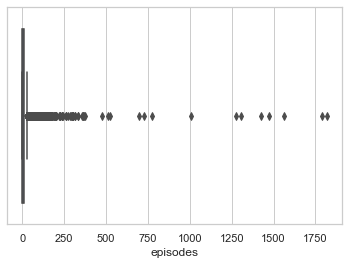

In [11]:
atr = 'episodes'
ax = sns.boxplot(x=dfAnime[atr])

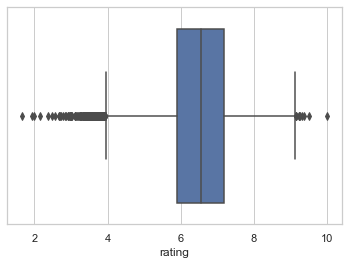

In [12]:
atr = 'rating'
ax = sns.boxplot(x=dfAnime[atr])

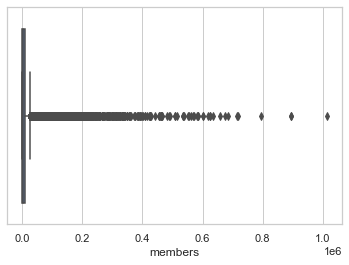

In [13]:
atr = 'members'
ax = sns.boxplot(x=dfAnime[atr])